## Group Project - Movie Rating Predictions

### 1. Choose a real-world dataset

##### 1.1 About Dataset

https://www.kaggle.com/datasets/ashishkumarjayswal/movies-dataset?datasetId=3478473

###### Data is about 4000 movies with 17 columns which include: 
###### "movie_name";"rating_target_audience";"genre";"release_year";"release_date";"release_year_and_country";
###### "score";"votes";"director";"writer";"star";"country";"budget";"gross";"company";"runtime"

##### 1.2 Import Libraries 

In [3]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

##### 1.3 Load Dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/MBAN%206110/Datasets/movies_data_update.csv')
df

,Unnamed: 0,movie_name,rating_target_audience,genre,release_year,release_date,release_year_and_country,score,votes,director,writer,star,country,budget,gross,company,runtime
0,0,The Shining,R,Drama,1980,13-Jun,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,02-Jul,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20-Jun,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,02-Jul,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,25-Jul,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Birthday Girl,R,Comedy,2001,01-Feb,2002 (United States),6.1,25000.0,Jez Butterworth,Tom Butterworth,Nicole Kidman,United Kingdom,13000000.0,16171098.0,FilmFour,93.0
3996,3996,Human Nature,R,Comedy,2001,12-Sep,2001 (France),6.4,18000.0,Michel Gondry,Charlie Kaufman,Tim Robbins,France,0.0,1574660.0,Fine Line Features,96.0
3997,3997,Made,R,Comedy,2001,31-Aug,2001 (United States),6.4,18000.0,Jon Favreau,Jon Favreau,Vince Vaughn,United States,5000000.0,5480653.0,Artisan Entertainment,95.0
3998,3998,One Night at McCool's,R,Comedy,2001,27-Apr,2001 (United States),6.1,29000.0,Harald Zwart,Stan Seidel,Liv Tyler,United States,18000000.0,13578186.0,October Films,93.0


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4000.0,1.999500e+03,1.154845e+03,0.0,999.75,1999.5,2999.25,3.999000e+03
release_year,4000.0,1.991191e+03,5.934529e+00,1980.0,1986.00,1991.0,1996.00,2.001000e+03
score,3948.0,6.318870e+00,9.771891e-01,2.2,5.70,6.4,7.00,9.300000e+00
votes,3948.0,5.514066e+04,1.435942e+05,51.0,4400.00,14000.0,46000.00,2.400000e+06
budget,3948.0,1.561129e+07,2.257217e+07,0.0,0.00,7450000.0,22000000.00,2.000000e+08
gross,3787.0,4.219345e+07,9.302749e+07,309.0,3009549.00,12214338.0,36299809.00,2.201647e+09
runtime,3941.0,1.057336e+02,1.854471e+01,55.0,94.00,102.0,114.00,3.570000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4000 non-null   int64  
 1   movie_name                4000 non-null   object 
 2   rating_target_audience    3960 non-null   object 
 3   genre                     4000 non-null   object 
 4   release_year              4000 non-null   int64  
 5   release_date              4000 non-null   object 
 6   release_year_and_country  3948 non-null   object 
 7   score                     3948 non-null   float64
 8   votes                     3948 non-null   float64
 9   director                  3948 non-null   object 
 10  writer                    3948 non-null   object 
 11  star                      3947 non-null   object 
 12  country                   3948 non-null   object 
 13  budget                    3948 non-null   float64
 14  gross   

Change the "release_date" date type

### 2. Define a Problem Statement and Hypothesis

##### 2.1 Problem Statement:
This project aims to build a model suitable for predicting the score of a movie using Directors, Scriptwriters, Movie Actors, Country, Companies, Genre, Revenue, Budget, Votes, Release year, Runtime and Movie names as predictor variables.


##### 2.2 Hypothesis

### 3. Conduct Exploratory Data Analysis (EDA)

##### 3.1 Data Cleaning

###### Deal with duplicates

In [9]:
df.drop(columns=['Unnamed: 0', 'release_year_and_country'], axis= 1, inplace= True)

In [10]:
df = df.drop_duplicates()

In [11]:
df.describe(include='all')

,movie_name,rating_target_audience,genre,release_year,release_date,score,votes,director,writer,star,country,budget,gross,company,runtime
count,4000,3960,4000,4000.000000,4000,3948.000000,3.948000e+03,3948,3948,3947,3948,3.948000e+03,3.787000e+03,3938,3941.000000
unique,3971,11,17,NaN,406,NaN,NaN,1664,2660,1627,44,NaN,NaN,1281,NaN
top,Hamlet,R,Comedy,NaN,25-Dec,NaN,NaN,Woody Allen,Stephen King,Robert De Niro,United States,NaN,NaN,Paramount Pictures,NaN
freq,3,2043,1355,NaN,49,NaN,NaN,22,27,27,2952,NaN,NaN,191,NaN
mean,NaN,NaN,NaN,1991.191500,NaN,6.318870,5.514066e+04,NaN,NaN,NaN,NaN,1.561129e+07,4.219345e+07,NaN,105.733570
std,NaN,NaN,NaN,5.934529,NaN,0.977189,1.435942e+05,NaN,NaN,NaN,NaN,2.257217e+07,9.302749e+07,NaN,18.544707
min,NaN,NaN,NaN,1980.000000,NaN,2.200000,5.100000e+01,NaN,NaN,NaN,NaN,0.000000e+00,3.090000e+02,NaN,55.000000
25%,NaN,NaN,NaN,1986.000000,NaN,5.700000,4.400000e+03,NaN,NaN,NaN,NaN,0.000000e+00,3.009549e+06,NaN,94.000000
50%,NaN,NaN,NaN,1991.000000,NaN,6.400000,1.400000e+04,NaN,NaN,NaN,NaN,7.450000e+06,1.221434e+07,NaN,102.000000
75%,NaN,NaN,NaN,1996.000000,NaN,7.000000,4.600000e+04,NaN,NaN,NaN,NaN,2.200000e+07,3.629981e+07,NaN,114.000000


###### Deal with missing values

In [12]:
df.isnull().sum().sum()

739

In [13]:
4000*0.1
# 749 > 400, if missing values > 10%, fillna in

400.0

In [14]:
df.isnull().sum()

movie_name                  0
rating_target_audience     40
genre                       0
release_year                0
release_date                0
score                      52
votes                      52
director                   52
writer                     52
star                       53
country                    52
budget                     52
gross                     213
company                    62
runtime                    59
dtype: int64

In [15]:
df['score'].fillna(df['score'].median(), inplace=True)
df['votes'].fillna(df['votes'].mean(), inplace=True)
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['gross'].fillna(df['gross'].mean(), inplace=True)
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

df['rating_target_audience'].fillna('other', inplace=True)
df['director'].fillna('other', inplace=True)
df['writer'].fillna('other', inplace=True)
df['star'].fillna('other', inplace=True)
df['country'].fillna('other', inplace=True)
df['company'].fillna('other', inplace=True)

###### Dealing with target variable

In [16]:
# univariate analysis - check the target variable
df.groupby('score').count()

,movie_name,rating_target_audience,genre,release_year,release_date,votes,director,writer,star,country,budget,gross,company,runtime
score,,,,,,,,,,,,,,
2.2,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.5,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2.7,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2.9,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8.7,3,3,3,3,3,3,3,3,3,3,3,3,3,3
8.8,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [17]:
df['score'].describe()

count    4000.000000
mean        6.319925
std         0.970858
min         2.200000
25%         5.700000
50%         6.400000
75%         7.000000
max         9.300000
Name: score, dtype: float64

Although "score" is a continous variable, while it has small range, so we decide to transform the numerical variable to the categorical variable.

In [18]:
def rating_level(x):
    if x >= 0 and x < 5:
        return 'Low'
    elif x >= 5 and x < 7:
        return "Moderate"
    elif x >= 7 and x <= 10:
        return "High"

In [19]:
df['score'] = df['score'].apply(rating_level)

In [20]:
df.groupby(['score']).count()

,movie_name,rating_target_audience,genre,release_year,release_date,votes,director,writer,star,country,budget,gross,company,runtime
score,,,,,,,,,,,,,,
High,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061
Low,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Moderate,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596,2596


In [21]:
df2 = df

In [22]:
df2.isnull().sum()

movie_name                0
rating_target_audience    0
genre                     0
release_year              0
release_date              0
score                     0
votes                     0
director                  0
writer                    0
star                      0
country                   0
budget                    0
gross                     0
company                   0
runtime                   0
dtype: int64

In [23]:
df2.columns

Index(['movie_name', 'rating_target_audience', 'genre', 'release_year',
       'release_date', 'score', 'votes', 'director', 'writer', 'star',
       'country', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

##### 3.2 Data Visualization

Numerical Variables

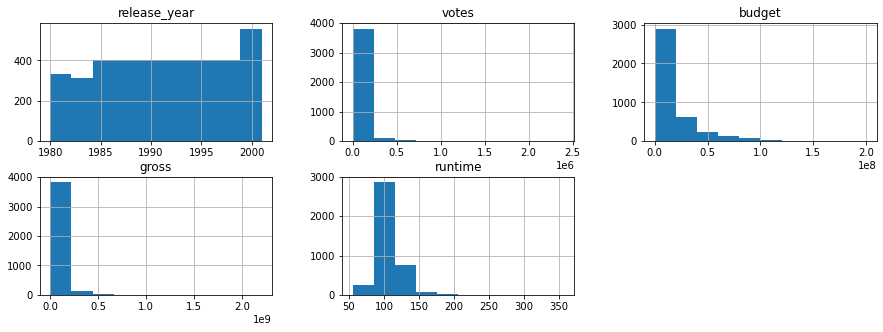

In [24]:
num_rows = 2 
num_cols = 3  

df2.hist(figsize=(15, 5), layout=(num_rows, num_cols))

plt.show()

(0.0, 1.0, 0.0, 1.0)

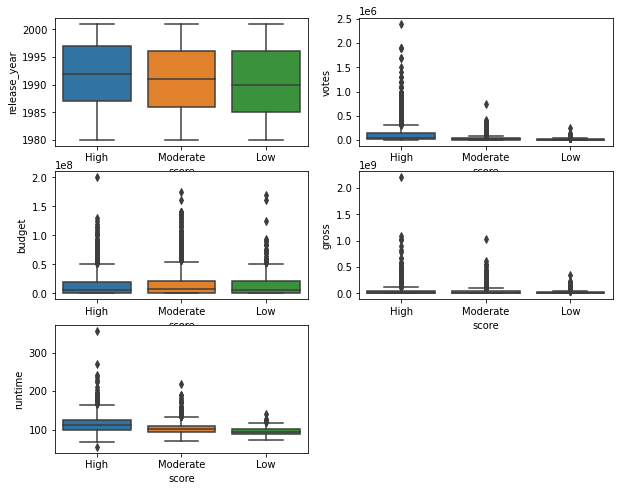

In [25]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(10,8))

sns.boxplot(x='score',y='release_year', data=df2, ax=ax1)
sns.boxplot(x='score',y='votes', data=df2, ax=ax2)
sns.boxplot(x='score',y='budget', data=df2, ax=ax3)
sns.boxplot(x='score',y='gross', data=df2, ax=ax4)
sns.boxplot(x='score',y='runtime', data=df2, ax=ax5)

_.axis('off')

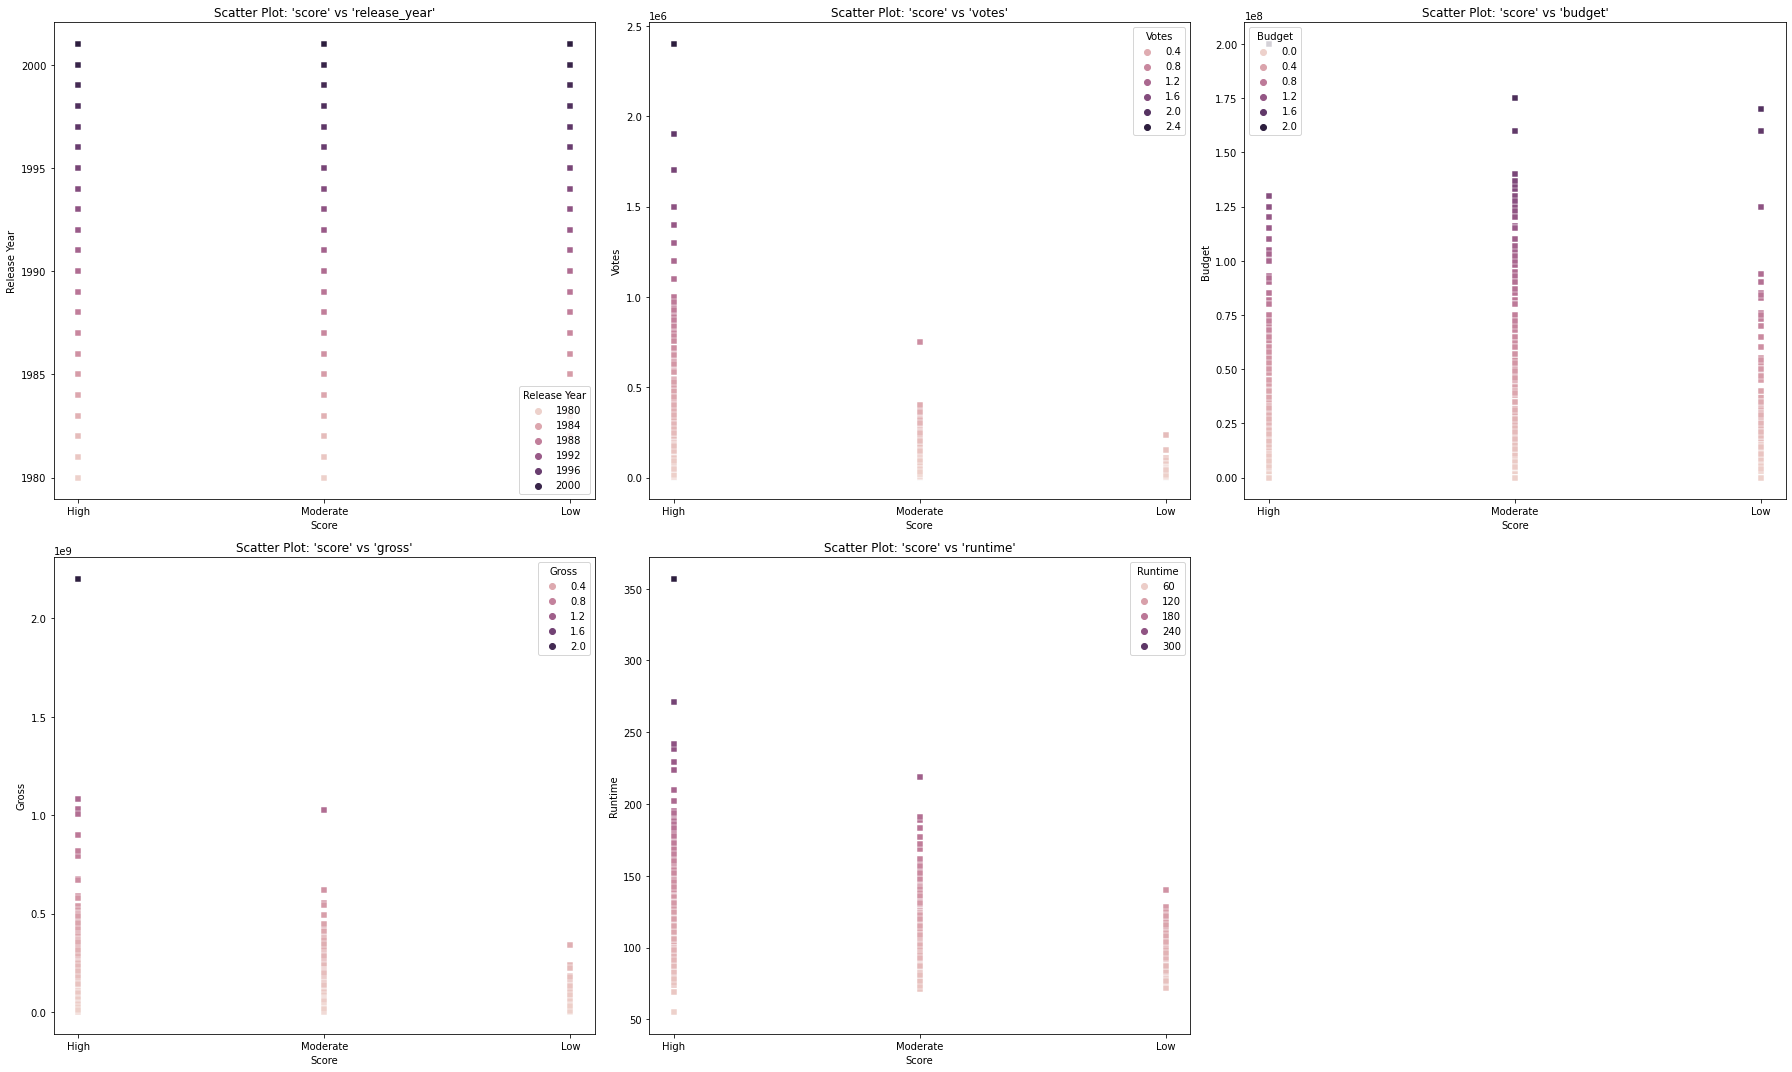

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15))

# Scatter plot for 'score' vs 'release_year'
sns.scatterplot(x='score', y='release_year', data=df2, hue='release_year', marker='s', ax=axes[0, 0])
axes[0, 0].set_title("Scatter Plot: 'score' vs 'release_year'")
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Release Year')
axes[0, 0].legend(title='Release Year')

# Scatter plot for 'score' vs 'votes'
sns.scatterplot(x='score', y='votes', data=df2, hue='votes', marker='s', ax=axes[0, 1])
axes[0, 1].set_title("Scatter Plot: 'score' vs 'votes'")
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Votes')
axes[0, 1].legend(title='Votes')

# Scatter plot for 'score' vs 'budget'
sns.scatterplot(x='score', y='budget', data=df2, hue='budget', marker='s', ax=axes[0, 2])
axes[0, 2].set_title("Scatter Plot: 'score' vs 'budget'")
axes[0, 2].set_xlabel('Score')
axes[0, 2].set_ylabel('Budget')
axes[0, 2].legend(title='Budget')

# Scatter plot for 'score' vs 'gross'
sns.scatterplot(x='score', y='gross', data=df2, hue='gross', marker='s', ax=axes[1, 0])
axes[1, 0].set_title("Scatter Plot: 'score' vs 'gross'")
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Gross')
axes[1, 0].legend(title='Gross')

# Scatter plot for 'score' vs 'runtime'
sns.scatterplot(x='score', y='runtime', data=df2, hue='runtime', marker='s', ax=axes[1, 1])
axes[1, 1].set_title("Scatter Plot: 'score' vs 'runtime'")
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Runtime')
axes[1, 1].legend(title='Runtime')

# Hide the empty subplot at the bottom-right
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


### 4. Feature Engineering

##### 4.1 Transformation

##### 4.1.1 Categorical Variables

In [27]:
df2.nunique()

movie_name                3971
rating_target_audience      12
genre                       17
release_year                22
release_date               406
score                        3
votes                      637
director                  1665
writer                    2661
star                      1628
country                     45
budget                     267
gross                     3782
company                   1282
runtime                    132
dtype: int64

4.1.1.1 Categorize the Countries into Continents

In [28]:
df2['country'].value_counts()

country
United States                     2952
United Kingdom                     385
France                             141
Canada                              98
Australia                           52
other                               52
Japan                               44
Italy                               44
Germany                             43
Hong Kong                           26
Spain                               19
Ireland                             16
Mexico                              11
Denmark                             11
West Germany                        11
Sweden                              10
New Zealand                         10
Switzerland                          8
Netherlands                          7
India                                6
Iran                                 6
Taiwan                               5
Yugoslavia                           5
South Africa                         4
China                                3
Hungary          

In [29]:
df2['country'].nunique(), df2['country'].unique()

(45,
 array(['United Kingdom', 'United States', 'South Africa', 'West Germany',
        'Canada', 'Australia', 'Libya', 'Italy', 'Soviet Union', 'France',
        'Hong Kong', 'South Korea', 'other', 'Sweden', 'Spain', 'Mexico',
        'Switzerland', 'Netherlands', 'New Zealand', 'Philippines',
        'Israel', 'Japan', 'Hungary', 'Brazil', 'Yugoslavia', 'Argentina',
        'Ireland', 'Denmark', 'Germany', 'Iran', 'China', 'Belgium',
        'Taiwan', 'Austria', 'Portugal', 'Vietnam',
        'Republic of Macedonia', 'Russia',
        'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic',
        'Norway', 'India', 'Jamaica', 'Aruba'], dtype=object))

In [30]:
Europe = ['United Kingdom', 'West Germany', 'Italy', 'Soviet Union', 'France', 'Sweden', 'Spain', 'Switzerland', 'Netherlands', 'Hungary', 'Yugoslavia', 'Ireland', 'Denmark', 'Germany', 'Belgium', 'Austria', 'Portugal', 'Republic of Macedonia', 'Russia', 'Federal Republic of Yugoslavia', 'Greece', 'Czech Republic', 'Norway']
North_America = ['United States', 'Canada', 'Mexico', 'Jamaica', 'Aruba']
#Africa = ['South Africa', 'Libya']
#Oceania =['Australia', 'New Zealand']
#Asia = ['Hong Kong', 'South Korea', 'Philippines', 'Israel', 'Japan', 'Iran', 'China', 'Taiwan', 'Vietnam', 'India']
#South_America =['Brazil', 'Argentina']
Other = ['South Africa', 'Libya', 'Australia', 'New Zealand', 'Hong Kong', 'South Korea', 'Philippines', 'Israel', 'Japan', 'Iran', 'China', 'Taiwan', 'Vietnam', 'India', 'Brazil', 'Argentina', 'other']

In [31]:
def continents(country):
    if country in Europe:
        return 'Europe'
    elif country in North_America:
        return 'North_America'
    else:
        return 'Other'

df2['continent'] = df2['country'].apply(continents)

continent_counts = df2['continent'].value_counts()

print(continent_counts)

continent
North_America    3063
Europe            716
Other             221
Name: count, dtype: int64


4.1.1.2 Categorize the rating_target_audience

In [32]:
df2['rating_target_audience'].value_counts()

rating_target_audience
R            2043
PG-13         848
PG            815
G             106
Not Rated      92
other          40
Unrated        32
NC-17          14
TV-MA           4
X               3
TV-PG           2
Approved        1
Name: count, dtype: int64

In [33]:
def classify_rating(rating):
    if rating in ['R', 'PG-13', 'PG']:
        return rating
    else:
        return 'Other'

df2['rating_target_audience'] = df2['rating_target_audience'].apply(classify_rating)

rating_counts = df2['rating_target_audience'].value_counts()

print(rating_counts)

rating_target_audience
R        2043
PG-13     848
PG        815
Other     294
Name: count, dtype: int64


4.1.1.3 Categorize the genre

In [34]:
df2['genre'].value_counts()

genre
Comedy       1355
Drama         807
Action        775
Crime         302
Adventure     231
Biography     175
Horror        158
Animation     113
Fantasy        33
Mystery        13
Thriller       11
Romance         8
Family          8
Sci-Fi          6
Western         3
Music           1
History         1
Name: count, dtype: int64

In [35]:
def classify_genre(genre):
    if genre in ['Comedy', 'Drama', 'Action', 'Crime', 'Adventure', 'Biography', 'Horror', 'Animation']:
        return genre
    else:
        return 'Other'

df2['genre'] = df2['genre'].apply(classify_genre)

genre_counts = df2['genre'].value_counts()

print(genre_counts)

genre
Comedy       1355
Drama         807
Action        775
Crime         302
Adventure     231
Biography     175
Horror        158
Animation     113
Other          84
Name: count, dtype: int64


4.1.1.4 Categorize the release_date

4.1.1.5 Categorize the director

In [36]:
df2['director'].value_counts()

director
other                   52
Woody Allen             22
Barry Levinson          16
Clint Eastwood          16
Directors               16
                        ..
John Patrick Shanley     1
William Peter Blatty     1
Jack Nicholson           1
Hendel Butoy             1
Harald Zwart             1
Name: count, Length: 1665, dtype: int64

In [37]:
def classify_director(director_counts, other_label="Other"):
    classified_directors = {}
    for value, count in director_counts.items():
        if count == 1 or value == "other":
            classified_directors[value] = other_label
        else:
            classified_directors[value] = "Popular_Director"
    return classified_directors

# Get the director value counts
director_counts = df2['director'].value_counts()

# Apply the function to the 'director' column
df2['director'] = df2['director'].apply(lambda x: classify_director(director_counts)[x])

# Get the updated director value counts
updated_director_counts = df2['director'].value_counts()

# Print the updated value counts
print(updated_director_counts)


director
Popular_Director    3033
Other                967
Name: count, dtype: int64


4.1.1.6 Categorize the writer

In [38]:
df2['writer'].value_counts()

writer
other            52
Stephen King     27
John Hughes      24
Woody Allen      21
David Mamet      13
                 ..
Robin Menken      1
Rob Hedden        1
Seth Winston      1
Steven Siegel     1
Stan Seidel       1
Name: count, Length: 2661, dtype: int64

In [39]:
def classify_writer(writer_counts, other_label="Other"):
    classified_writers = {}
    for value, count in writer_counts.items():
        if count == 1 or value == "other":
            classified_writers[value] = other_label
        else:
            classified_writers[value] = "Popular_Writer"
    return classified_writers

# Get the writer value counts
writer_counts = df2['writer'].value_counts()

# Apply the function to the 'writer' column
df2['writer'] = df2['writer'].apply(lambda x: classify_writer(writer_counts)[x])

# Get the updated writer value counts
updated_writer_counts = df2['writer'].value_counts()

# Print the updated value counts
print(updated_writer_counts)

writer
Other             2031
Popular_Writer    1969
Name: count, dtype: int64


4.1.1.7 Categorize the star

In [40]:
df2['star'].value_counts()

star
other             53
Robert De Niro    27
Mel Gibson        25
Tom Hanks         24
John Travolta     23
                  ..
Carmen Maura       1
Tami Erin          1
Amanda Donohoe     1
Doug Bradley       1
Mekhi Phifer       1
Name: count, Length: 1628, dtype: int64

In [41]:
def classify_star(star_counts, other_label="Other"):
    classified_stars = {}
    for value, count in star_counts.items():
        if count == 1 or value == "other":
            classified_stars[value] = other_label
        else:
            classified_stars[value] = "Popular_Star"
    return classified_stars

# Get the star value counts
star_counts = df2['star'].value_counts()

# Apply the function to the 'star' column
df2['star'] = df2['star'].apply(lambda x: classify_star(star_counts)[x])

# Get the updated star value counts
updated_star_counts = df2['star'].value_counts()

# Print the updated value counts
print(updated_star_counts)

star
Popular_Star    2908
Other           1092
Name: count, dtype: int64


4.1.1.8 Categorize the company

In [42]:
df2['company'].value_counts()

company
Paramount Pictures       191
Universal Pictures       191
Columbia Pictures        174
Warner Bros.             165
Twentieth Century Fox    122
                        ... 
Jascat                     1
Cinema Group               1
Mirabai Films              1
Burrowes Film Group        1
Chickie the Cop            1
Name: count, Length: 1282, dtype: int64

In [43]:
def classify_company(company_counts, other_label="Other"):
    classified_companys = {}
    for value, count in company_counts.items():
        if count == 1 or value == "other":
            classified_companys[value] = other_label
        else:
            classified_companys[value] = "Popular_Company"
    return classified_companys

# Get the company value counts
company_counts = df2['company'].value_counts()

# Apply the function to the 'company' column
df2['company'] = df2['company'].apply(lambda x: classify_company(company_counts)[x])

# Get the updated company value counts
updated_company_counts = df2['company'].value_counts()

# Print the updated value counts
print(updated_company_counts)

company
Popular_Company    3039
Other               961
Name: count, dtype: int64


In [44]:
df2.columns

Index(['movie_name', 'rating_target_audience', 'genre', 'release_year',
       'release_date', 'score', 'votes', 'director', 'writer', 'star',
       'country', 'budget', 'gross', 'company', 'runtime', 'continent'],
      dtype='object')

##### 4.2 Feature Selection

### 5. Model Development

In [1]:
cat_columns = ['rating_target_audience', 'genre', 'director', 'writer', 'star', 'continent', 'company']
num_columns = ['budget', 'votes', 'runtime']
target = ['score']

In [2]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_columns), ('cat', cat_transformer, cat_columns)])
preprocessor

NameError: name 'Pipeline' is not defined

In [ ]:
X = df2[num_columns + cat_columns]
y = df2[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 123)

RANDOM FOREST CLASSIFIER

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

In [ ]:
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
rf_accuracy = accuracy_score(y_test, y_pred)

print(f"RANDOM FOREST CLASSIFIER ACCURACY: {rf_accuracy: .2f}")

RANDOM FOREST CLASSIFIER ACCURACY:  0.76


----0.84

RANDOM FOREST CLASSIFIER W/ RANDOM SEARCH

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'classifier__n_estimators': n_estimators,
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap}
print(random_grid)

{'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]}


In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gross', 'votes',
                                                   'runtime']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating_target_audience',
                                                   'genre', 'director',
                                                   'writer', 'star',
                                                   'continent', 'company'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf_pipeline, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.5s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.9s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=50, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=600; total time=   5.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=600; total time=   5.7s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=600; total time=   4.7s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=600; total time=   5.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=90, classifier__max_features=sqrt, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=600; total time=   4.5s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=600; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=600; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=600; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, cla

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1400; total time=  12.9s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1400; total time=  15.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1400; total time=  12.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1400; total time=  13.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=30, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=1400; total time=  12.3s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=1000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=80, classifier__max_features=auto, classifier__min_samples_leaf=1, classifier__min_samples_split=1

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   4.4s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   4.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   4.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   3.7s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=False, classifier__max_depth=60, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=400; total time=   3.6s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=2000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=2000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=2000; total time=   0.0s
[CV] END classifier__bootstrap=False, classifier__max_depth=50, classifier__max_features=auto, classifier__min_samples_leaf=2, classifier__min_samples_split=2, 

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.6s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.4s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   0.8s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__max_features=sqrt, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200; total time=   1.6s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1200; total time=   0.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1200; total time=   0.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=1200; total time=   0.0s
[CV] END classifier__bootstrap=True, classifier__max_depth=100, classifier__max_features=auto, classifier__min_samples_leaf=4, classifier__min_samples_split=2, cl

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['gross',
                                                                                'votes',
                                                                                'runtime']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['rating_target_audience',
                                                                                'genre',
                                                                                'director',
                                                                                'writer',
                                                                                'star',
                                                                                'continent',
                                                                                'company'])])),
                                             ('class...
                   n_jobs=1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [10, 20, 30,
                                                                  40, 50, 60,
                                                                  70, 80, 90,
                                                                  100, 110,
                                                                  None],
                                        'classifier__max_features': ['auto',
                                                                     'sqrt'],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [200, 400,
                                                                     600, 800,
                                                                     1000, 1200,
                                                                     1400, 1600,
                                                                     1800,
                                                                     2000]},
                   random_state=42, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'classifier__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4], 'classifier__bootstrap': [True, False]} 

Best Parameters:  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 50, 'classifier__bootstrap': True}  



In [ ]:
rf_random_best = rf_random.best_estimator_
y_pred = rf_random_best.predict(X_test)
rf_random_best_accuracy = accuracy_score(y_test, y_pred)
print(f" RANDOM FOREST W/ RANDOM SEARCH Accuracy: {rf_random_best_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


 RANDOM FOREST W/ RANDOM SEARCH Accuracy: 0.7541666666666667
Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.60      0.66       302
         Low       0.43      0.03      0.05       107
    Moderate       0.76      0.91      0.83       791

    accuracy                           0.75      1200
   macro avg       0.64      0.51      0.51      1200
weighted avg       0.72      0.75      0.72      1200



KNN CLASSIFIER

In [ ]:
knn_classifier = KNeighborsClassifier()


In [ ]:
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_classifier)
])
knn_pipeline.fit(X_train, y_train)


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gross', 'votes',
                                                   'runtime']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['rating_target_audience',
                                                   'genre', 'director',
                                                   'writer', 'star',
                                                   'continent', 'company'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7008333333333333
Classification Report:
              precision    recall  f1-score   support

        High       0.64      0.47      0.54       302
         Low       0.19      0.07      0.10       107
    Moderate       0.73      0.88      0.80       791

    accuracy                           0.70      1200
   macro avg       0.52      0.47      0.48      1200
weighted avg       0.66      0.70      0.67      1200



KNN CLASSIFIER W/ RANDOM SEARCH

In [ ]:
k_range = list(range(1,30))
param_grid = {
    'classifier__n_neighbors': k_range,
    'classifier__weights': ['uniform', 'distance']
}

In [ ]:
knn_random_search = RandomizedSearchCV(knn_pipeline, param_distributions= param_grid , n_iter = 5, cv = 10, verbose=2, random_state=42, n_jobs = 1)
knn_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=1, classifier__weights=uniform; total time=   0.0s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.0s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.2s
[CV] END classifier__n_neighbors=3, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=18, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.2s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=7, classifier__weights=distance; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s
[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.1s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END classifier__n_neighbors=23, classifier__weights=uniform; total time=   0.2s


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['gross',
                                                                                'votes',
                                                                                'runtime']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['rating_target_audience',
                                                                                'genre',
                                                                                'director',
                                                                                'writer',
                                                                                'star',
                                                                                'continent',
                                                                                'company'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_iter=5, n_jobs=1,
                   param_distributions={'classifier__n_neighbors': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19, 20,
                                                                    21, 22, 23,
                                                                    24, 25, 26,
                                                                    27, 28,
                                                                    29],
                                        'classifier__weights': ['uniform',
                                                                'distance']},
                   random_state=42, verbose=2)

In [ ]:
best_k = knn_random_search.best_params_['classifier__n_neighbors']
best_weight = knn_random_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

best_k:  18
best_weight:  uniform


In [ ]:
knn_random_best = knn_random_search.best_estimator_

# Model Evaluation
y_pred = knn_random_best.predict(X_test)
knn_random_search_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN RANDOM SEARCH Accuracy: {knn_random_search_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN RANDOM SEARCH Accuracy: 0.715
Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.39      0.50       302
         Low       0.36      0.04      0.07       107
    Moderate       0.72      0.93      0.81       791

    accuracy                           0.71      1200
   macro avg       0.60      0.45      0.46      1200
weighted avg       0.69      0.71      0.67      1200



KNN CLASSIFIER W/ GRID SEARCH

In [ ]:
knn_grid_search = GridSearchCV(knn_pipeline, param_grid=param_grid, cv = 10, scoring='accuracy', return_train_score= True)
knn_grid_search.fit(X_train, y_train)

best_k = knn_grid_search.best_params_['classifier__n_neighbors']
best_weight = knn_grid_search.best_params_['classifier__weights']

print('best_k: ', best_k)
print('best_weight: ', best_weight)

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

best_k:  16
best_weight:  uniform


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn_grid_best = knn_grid_search.best_estimator_

# Model Evaluation
y_pred = knn_grid_best.predict(X_test)
knn_grid_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN W/ GRID SEARCH Accuracy: {knn_grid_accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

KNN W/ GRID SEARCH Accuracy: 0.7133333333333334
Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.41      0.52       302
         Low       0.29      0.04      0.07       107
    Moderate       0.72      0.92      0.81       791

    accuracy                           0.71      1200
   macro avg       0.57      0.46      0.46      1200
weighted avg       0.68      0.71      0.67      1200



---0.815

NAIVE BAYES

In [ ]:
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_columns), 
    ('cat', cat_transformer, cat_columns)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
nb_random_search_accuracy = accuracy_score(y_test, y_pred)
print("NB accuracy:",nb_random_search_accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NB accuracy: 0.5316666666666666
[[160  17 125]
 [  3  70  34]
 [132 251 408]]
              precision    recall  f1-score   support

        High       0.54      0.53      0.54       302
         Low       0.21      0.65      0.31       107
    Moderate       0.72      0.52      0.60       791

    accuracy                           0.53      1200
   macro avg       0.49      0.57      0.48      1200
weighted avg       0.63      0.53      0.56      1200



c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
gnb = GaussianNB()
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_grid_search = GridSearchCV(gnb, param_grid=params_nb, cv = 5, scoring='accuracy', return_train_score= True)
x_transformed= preprocessor.fit_transform(X_train)

nb_grid_search.fit(x_transformed, y_train)


print('best_nb: ', nb_grid_search.best_estimator_)

c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

best_nb:  GaussianNB(var_smoothing=0.3511191734215131)


c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Golden Snow\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Assuming you have already performed the grid search and obtained the best estimator
nb_grid_best = nb_grid_search.best_estimator_

# Transform the test data using the preprocessor (assuming preprocessor was fit on training data)
x_test_transformed = preprocessor.transform(X_test)

# Make predictions on the transformed test data
y_pred = nb_grid_best.predict(x_test_transformed)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
nb_grid_accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model with the best estimator found from the grid search
print(f"NB W/ GRID SEARCH Accuracy: {nb_grid_accuracy}")

# Print the classification report which includes precision, recall, F1-score, and support for each class
print("Classification Report:")
print(classification_report(y_test, y_pred))


NB W/ GRID SEARCH Accuracy: 0.6866666666666666
Classification Report:
              precision    recall  f1-score   support

        High       0.69      0.24      0.35       302
         Low       0.23      0.03      0.05       107
    Moderate       0.69      0.95      0.80       791

    accuracy                           0.69      1200
   macro avg       0.54      0.40      0.40      1200
weighted avg       0.65      0.69      0.62      1200

